In [4]:
%matplotlib inline
import seaborn as sns, pandas as pd, numpy as np
from matplotlib import pyplot as plt

# Data design:

Image of design (Pathway/Signaling): http://postimg.org/image/gyxs8adwh/

Files:

- all_genes: Gene expression
- design: Drug effects on Rats
- mod_nodevalues: Value for each node in metabolic activity (Metabolic/Signaling activities)
- mod_activities: Propagated value through pathway activity (last node of above)
- mod_genevalues: Metabolic genes (subset of all genes)
- path_vals: ???
- signaling_genes: subset of genes involved in cell signalling



## RNA_Seq data:

In [4]:
pd.version.short_version

'0.16.2'

In [2]:
%%file load_data.py
import pandas as pd, sys, os

dtype = sys.argv[1]

if dtype.lower() in 'rnaseq':
    print "loading rnaseq data"
    rnaseq_all_genes = pd.read_csv('../Data/RNASeq/RNAseq_all_genes.csv', sep=',', index_col=0, header=0)
    rnaseq_all_genes.index.name = 'Entrez_ID'
    rnaseq_effector_genes = pd.read_csv('../Data/RNASeq/rnaseq_effector_path_vals.csv', sep=',', index_col=0, header=0)
    rnaseq_mod_activities = pd.read_csv('../Data/RNASeq/rnaseq_metabolic_mod_activities.csv', sep=',', index_col=0, header=0)
    rnaseq_mod_genevalues = pd.read_csv('../Data/RNASeq/rnaseq_metabolic_mod_genevalues.csv', sep=',', index_col=0, header=0)
    rnaseq_mod_nodevalues = pd.read_csv('../Data/RNASeq/rnaseq_metabolic_mod_nodevalues.csv', sep=',', index_col=0, header=0)
    rnaseq_signaling_genes = pd.read_csv('../Data/RNASeq/rnaseq_signaling_genes.csv', sep=',', index_col=0, header=0)
    rnaseq_design = pd.read_csv('../Data/RNASeq/rnaseq_design.csv', index_col=1)
    rnaseq_design.columns = [u'idx', u'Drug/Chemical', u'Effect', u'Set']
    
    print "rnaseq_all_genes:", rnaseq_all_genes.shape
    print "rnaseq_effector_genes:", rnaseq_effector_genes.shape
    print "rnaseq_mod_activities:", rnaseq_mod_activities.shape
    print "rnaseq_mod_genevalues:", rnaseq_mod_genevalues.shape
    print 'rnaseq_mod_nodevalues:', rnaseq_mod_nodevalues.shape
    print 'rnaseq_signaling_genes:', rnaseq_signaling_genes.shape
    print 'rnaseq_design:', rnaseq_design.shape
else:
    print "loading microarray data"
    micro_all_genes = pd.read_csv('../Data/MicroArray/microarray_all_genes.csv', sep=',', index_col=0, header=0)
    micro_all_genes.index.name = 'Entrez_ID'
    micro_effector_genes = pd.read_csv('../Data/MicroArray/microarray_effector_path_vals.csv', sep=',', index_col=0, header=0)
    micro_mod_activities = pd.read_csv('../Data/MicroArray/microarray_metabolic_mod_activities.csv', sep=',', index_col=0, header=0)
    micro_mod_genevalues = pd.read_csv('../Data/MicroArray/microarray_metabolic_mod_genevalues.csv', sep=',', index_col=0, header=0)
    micro_mod_nodevalues = pd.read_csv('../Data/MicroArray/microarray_metabolic_mod_nodevalues.csv', sep=',', index_col=0, header=0)
    micro_signaling_genes = pd.read_csv('../Data/MicroArray/microarray_signaling_genes.csv', sep=',', index_col=0, header=0)
    micro_design = pd.read_csv('../Data/MicroArray/microarray_design.csv', index_col=1)
    micro_design.columns = [u'idx', u'Drug/Chemical', u'Effect', u'Set']


    print "micro_all_genes:", micro_all_genes.shape
    print "micro_effector_genes:", micro_effector_genes.shape
    print "micro_mod_activities:", micro_mod_activities.shape
    print "micro_mod_genevalues:", micro_mod_genevalues.shape
    print 'micro_mod_nodevalues:', micro_mod_nodevalues.shape
    print 'micro_signaling_genes:', micro_signaling_genes.shape
    print 'micro_design:', micro_design.shape

Overwriting load_data.py


In [12]:
%run load_data.py rnaseq

loading rnaseq data
rnaseq_all_genes: (11216, 104)
rnaseq_effector_genes: (1044, 104)
rnaseq_mod_activities: (89, 104)
rnaseq_mod_genevalues: (172, 104)
rnaseq_mod_nodevalues: (462, 104)
rnaseq_signaling_genes: (2184, 104)
rnaseq_design: (104, 4)


## Design data

In [13]:
train_idx = rnaseq_design.Set == 'TRAINING SET'
test_idx = ~train_idx

In [14]:
labels = rnaseq_design.Effect

## RNASeq all data

In [15]:
random_sub = np.random.choice(rnaseq_all_genes.index, 5)

/Users/maxz/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


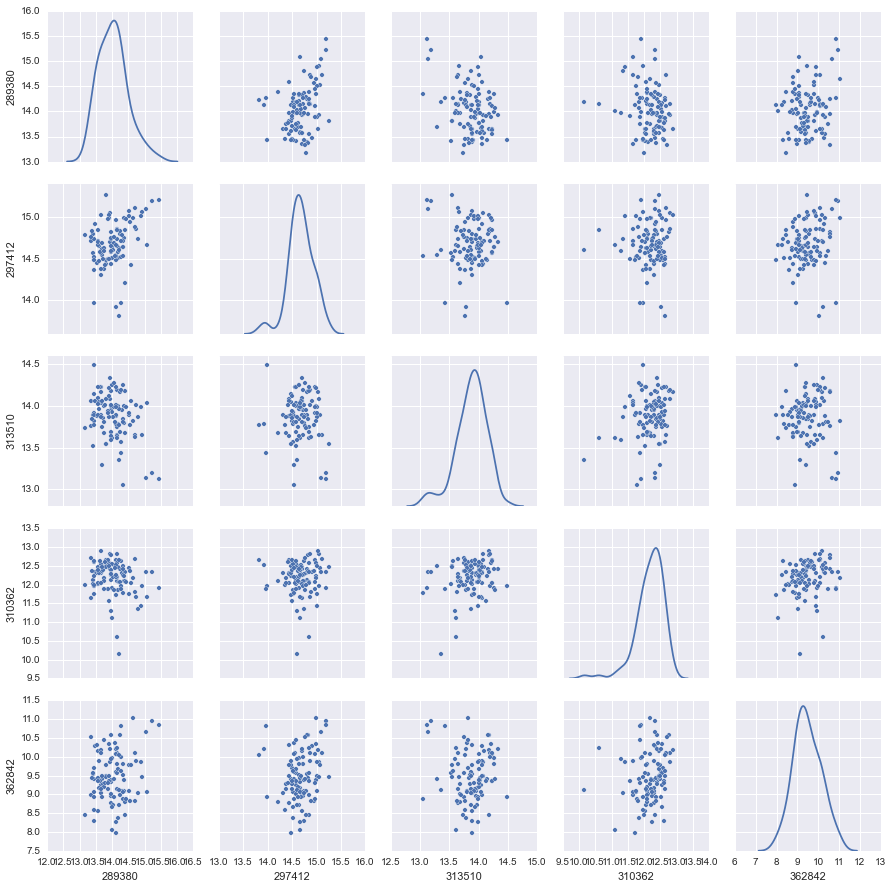

In [16]:
sns.pairplot(rnaseq_all_genes.loc[random_sub].T, diag_kind='kde', kind='scatter')

In [8]:
from sklearn import manifold, decomposition

In [9]:
p = decomposition.PCA(n_components=5)

In [67]:
X = pd.DataFrame(p.fit_transform(genes.T.values, 5))

In [69]:
X['labels'] = labels

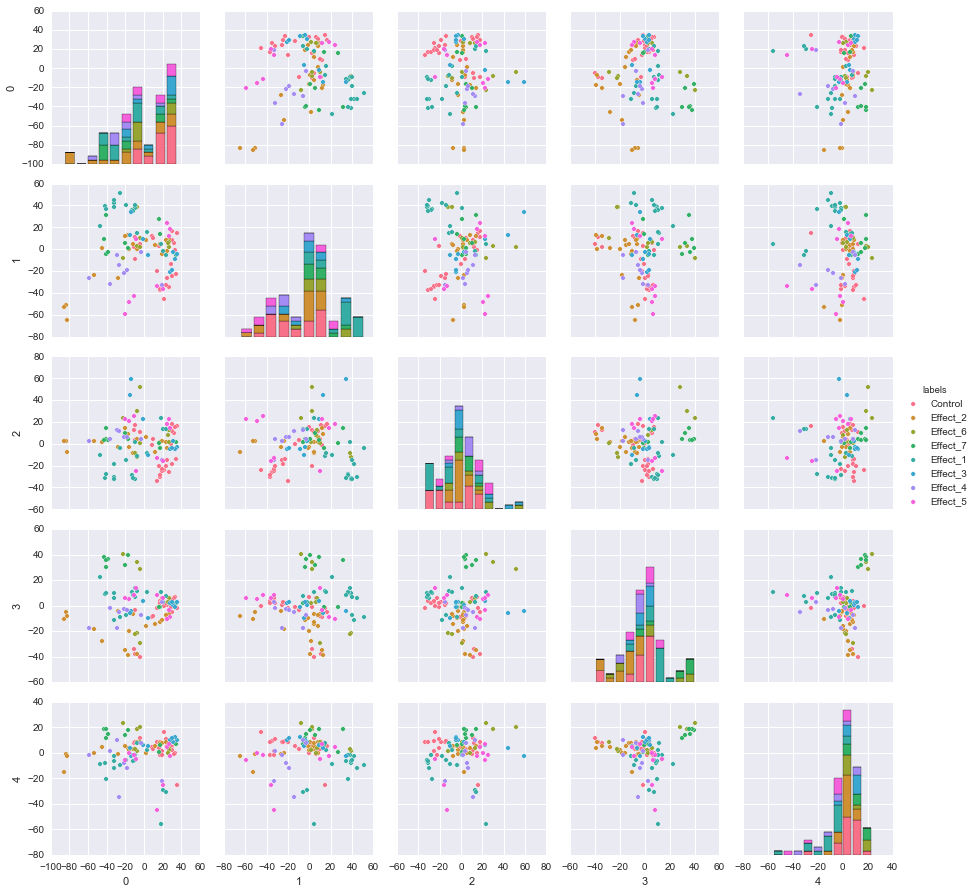

In [70]:
sns.pairplot(X, hue='labels')

## Metabolic Genes:


In [22]:
X_effector = pd.DataFrame(p.fit_transform(rnaseq_effector_genes.T), index=rnaseq_effector_genes.columns).join(labels)

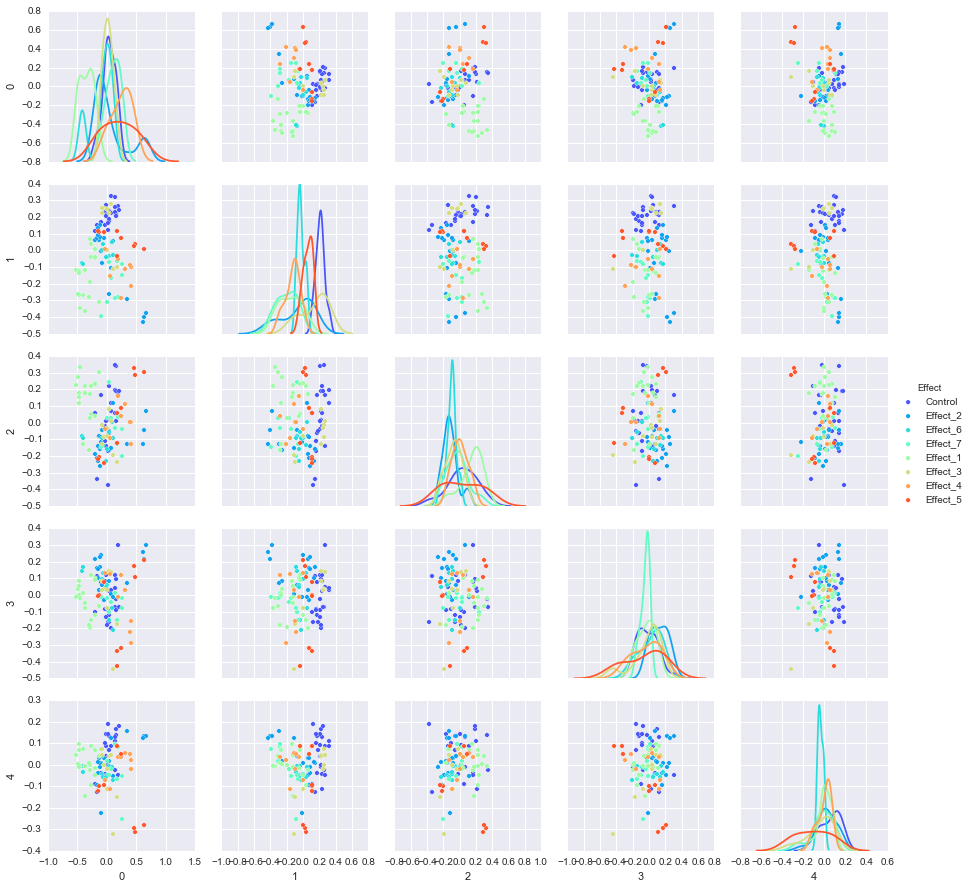

In [24]:
sns.pairplot(X_effector, hue='Effect', palette='rainbow', diag_kind='kde', )